In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import glob
from scipy.stats import linregress,norm
from scipy.optimize import curve_fit

In [2]:
def gaussian(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

In [3]:
shortreads = glob.glob('read/read_0.1_*')
rms_array = np.zeros((2532,3352))
datavalues =  np.zeros((len(shortreads),2532,3352))
i = 0
for file in shortreads:
    f = fits.open(file)
    datavalues[i,:,:] = f[0].data
    rms_array+= (f[0].data)**2
    f.close()
    i+= 1
median = np.median(datavalues,axis=0)
rms_array = np.sqrt(rms_array/len(shortreads))
print(np.mean(rms_array), np.median(rms_array), np.sqrt(np.mean(rms_array**2)-np.mean(rms_array)**2), np.sqrt(np.mean(rms_array**2))/np.sqrt(2532*3352))

179.505832745026 180.29337203569077 16.85685990148906 0.06188725708451653


180.6915996603943 16.783025174002503


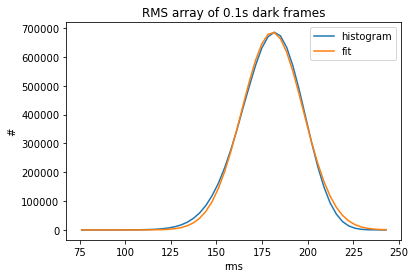

In [4]:
plt.figure()
n,edges = np.histogram(rms_array,bins=50)
centers = (edges[:-1]+edges[1:])/2
pars, matrix = curve_fit(gaussian,centers,n,(5e5,200,20))
fit = gaussian(centers,*pars)
plt.plot(centers,n,label='histogram')
plt.plot(centers,fit,label='fit')
plt.legend()
plt.title('RMS array of 0.1s dark frames')
plt.xlabel('rms'); plt.ylabel('#')
print(pars[1],pars[2])
#plt.savefig('read/short_fit.png',dpi=300)

#mean,std = norm.fit(rms_array)
#print(mean,std)
#x = np.linspace(edges[0],edges[-1],200)
#y = norm.pdf(x,mean,std)
#y*= np.max(n)/max(y)
#plt.plot(x,y)

In [5]:
midreads = glob.glob('read/read_1_*')
rms_array_2 = np.zeros((2532,3352))
for file in shortreads:
    f = fits.open(file)
    rms_array_2+= (f[0].data)**2
    f.close()
rms_array_2 = np.sqrt(rms_array_2/len(midreads))
print(np.mean(rms_array_2), np.median(rms_array_2), np.sqrt(np.mean(rms_array_2**2)-np.mean(rms_array_2)**2), np.sqrt(np.mean(rms_array_2**2))/np.sqrt(2532*3352))

327.7313126606676 329.1691561087298 30.776274722499295 0.11299015575770371


329.8962161836527 30.64147112380477


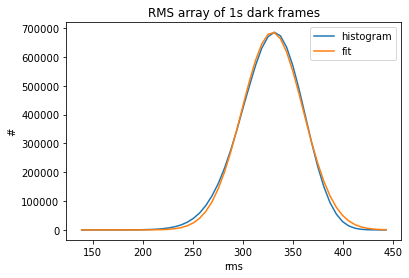

In [6]:
plt.figure()
n,edges = np.histogram(rms_array_2,bins=50)
centers = (edges[:-1]+edges[1:])/2
pars, matrix = curve_fit(gaussian,centers,n,(1e6,300,20))
fit = gaussian(centers,*pars)
plt.plot(centers,n,label='histogram')
plt.plot(centers,fit,label='fit')
plt.legend()
plt.title('RMS array of 1s dark frames')
plt.xlabel('rms'); plt.ylabel('#')
print(pars[1],pars[2])
#plt.savefig('read/mid_fit.png',dpi=300)

In [7]:
longreads = glob.glob('read/read_10_*')
rms_array_3 = np.zeros((2532,3352))
for file in shortreads:
    f = fits.open(file)
    rms_array_3+= (f[0].data)**2
    f.close()
rms_array_3 = np.sqrt(rms_array_3/len(longreads))
print(np.mean(rms_array_3), np.median(rms_array_3), np.sqrt(np.mean(rms_array_3**2)-np.mean(rms_array_3)**2), np.sqrt(np.mean(rms_array_3**2))/np.sqrt(2532*3352))

327.7313126606676 329.1691561087298 30.776274722499295 0.11299015575770371


329.8962161836527 30.64147112380477


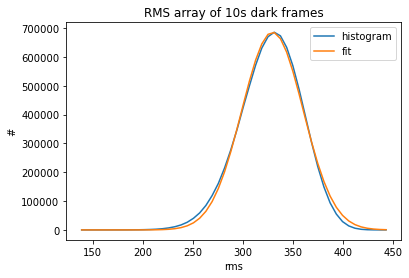

In [8]:
plt.figure()
n,edges = np.histogram(rms_array_3,bins=50)
centers = (edges[:-1]+edges[1:])/2
pars, matrix = curve_fit(gaussian,centers,n,(1e6,300,20))
fit = gaussian(centers,*pars)
plt.plot(centers,n,label='histogram')
plt.plot(centers,fit,label='fit')
plt.legend()
plt.title('RMS array of 10s dark frames')
plt.xlabel('rms'); plt.ylabel('#')
print(pars[1],pars[2])
#plt.savefig('read/long_fit.png',dpi=300)

In [9]:
int_files = ['int/int_0.fits','int/int_1.fits','int/int_2.fits','int/int_3.fits',
             'int/int_4.fits','int/int_5.fits','int/int_6.fits']
medians = []
for file in int_files:
    f = fits.open(file)
    medians.append(np.median(f[0].data))
    f.close()
print(medians)

[1036.0, 1036.0, 1037.0, 1038.0, 1037.0, 1033.0, 1036.0]


In [10]:
dark_files = ['dark/dark_0.2.fits','dark/dark_1.fits','dark/dark_5.fits',
              'dark/dark_25.fits','dark/dark_125.fits','dark/dark_500.fits']
exptimes = [0.2,1,5,25,125,500]
means = []
medians = []
fit_means = []
fit_sigmas = []
for file in dark_files:
    f = fits.open(file)
    means.append(np.mean(f[0].data))
    medians.append(np.median(f[0].data))
    mean,std = norm.fit(f[0].data)
    fit_means.append(mean); fit_sigmas.append(std)
    f.close()
fit_means = np.array(fit_means)
fit_sigmas = np.array(fit_sigmas)

0.10502716852051186 0.9961056588015751 0.004648095224626953
0.9145128435018008
-0.7044585064607773


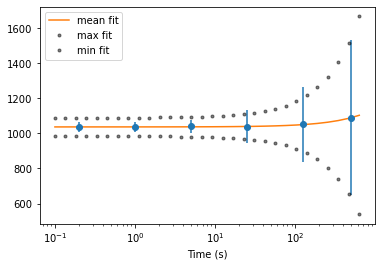

In [11]:
plt.figure()
m,b,r,p,stderr = linregress(exptimes,fit_means)
print(m,r,stderr)
time = np.logspace(-1,2.8,30); y1 = time*m+b
m,b,r,p,stderr = linregress(exptimes,fit_means+fit_sigmas); y2 = time*m+b
print(m)
m,b,r,p,stderr = linregress(exptimes,fit_means-fit_sigmas); y3 = time*m+b
print(m)
#plt.plot(exptimes,fit_means,'o')
plt.errorbar(exptimes,fit_means,yerr=fit_sigmas,fmt='o')
plt.plot(time,y1,label='mean fit')
plt.plot(time,y2,'k.',alpha=0.5,label='max fit')
plt.plot(time,y3,'k.',alpha=0.5,label='min fit')
plt.legend()
plt.xlabel('Time (s)')
plt.xscale('log')
#plt.savefig('dark/dark.png',dpi=300)

Text(0, 0.5, 'variance')

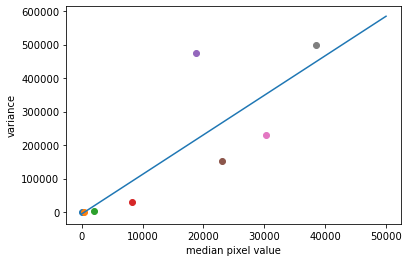

In [12]:
datatimes = [0.1,1,5,20,45,60,80,100]
plt.figure()
for time in datatimes:
    files = glob.glob(f'gain/gain_{time}_*')
    mean = np.zeros((2532,3352))
    rms = np.zeros((2532,3352))
    for file in files:
        f = fits.open(file)
        mean+= f[0].data-median
        rms+= (f[0].data-median)**2
        f.close()
    mean/= len(files)
    var = rms/len(files)-mean**2
    plt.scatter(np.median(mean),np.median(var))
    #print(np.median(mean),np.median(var))
x = np.linspace(0,5e4,10)
m = 11.8
b = -5583
y = m*x+b
plt.plot(x,y,label='least squares fit')
plt.xlabel('median pixel value'); plt.ylabel('variance')
#plt.xlim(-2000,5e4); plt.ylim(-1e4,6e5)
#plt.legend()
#plt.savefig(f'gain/gain_3.png',dpi=300)

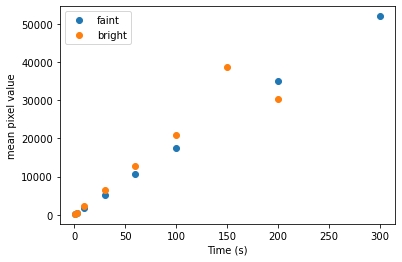

In [13]:
darktimes = np.array((1,3,10,30,60,100,200,300))
lighttimes = np.array((1,3,10,30,60,100,150,200))
darkmedians = []
lightmedians = []
for time in darktimes:
    f = fits.open(f'lin/lin_faint_{time}.fits')
    darkmedians.append(np.median(f[0].data-median))
    f.close()
for time in lighttimes:
    f = fits.open(f'lin/lin_bright_{time}.fits')
    lightmedians.append(np.median(f[0].data-median))
    f.close()
darkmedians = np.array(darkmedians); lightmedians = np.array(lightmedians)
plt.plot(darktimes,darkmedians,'o',label='faint')
plt.plot(lighttimes,0.6*lightmedians,'o',label='bright')
plt.xlabel('Time (s)'); plt.ylabel('mean pixel value')
plt.legend()
plt.savefig('lin/lin.png',dpi=300)